# **1. Decision Tree Classification of Social Network Ad in R**

## **Importing the dataset**

In [1]:
ds = read.csv('/content/Social_Network_Ads.csv')
cat("First three rows of dataset", "\n")
head(ds)

First three rows of dataset 


,User.ID,Gender,Age,EstimatedSalary,Purchased
,<int>,<chr>,<int>,<int>,<int>
1,15624510,Male,19,19000,0
2,15810944,Male,35,20000,0
3,15668575,Female,26,43000,0
4,15603246,Female,27,57000,0
5,15804002,Male,19,76000,0
6,15728773,Male,27,58000,0


In [2]:
#find number of rows with missing values
sum(!complete.cases(ds))

[1] 0

In [3]:
# Omit any null rows
ds = na.omit(ds)

In [4]:
ds = ds[3:5]

## **Visualizing the data**

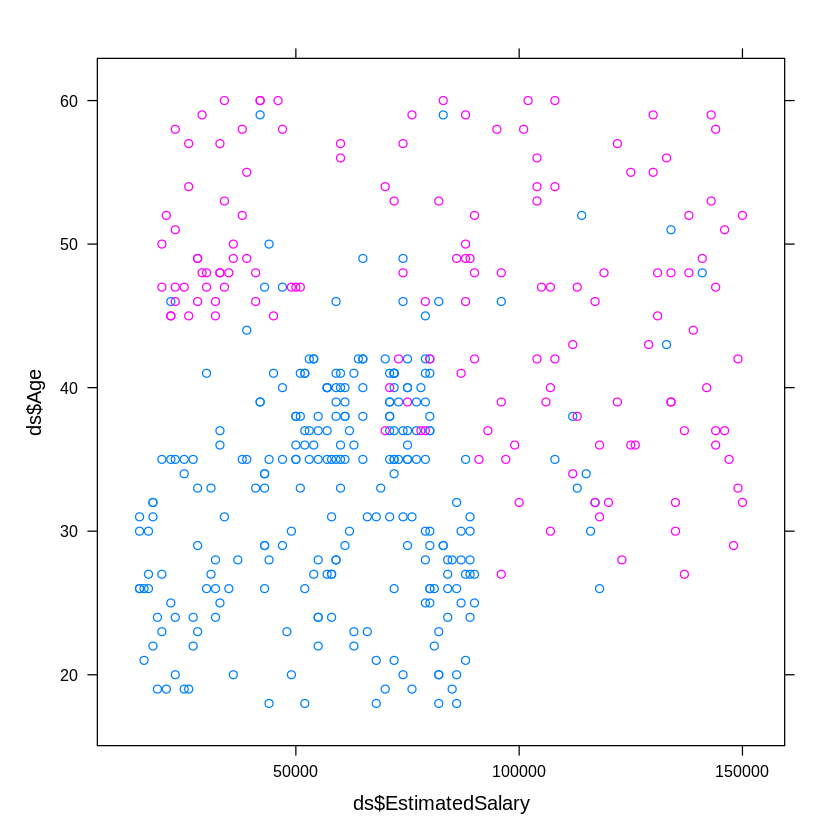

In [5]:
library(lattice)
xyplot(ds$Age ~ ds$EstimatedSalary, group=ds$Purchased, grid= FALSE, asp=1)

## **Splitting the dataset into the Train set and Test set**

In [6]:
ds$Purchased = factor(ds$Purchased, levels = c(0, 1))# if you provide the 'y' parameter with a vector it assumes regression (The '$' operator selects a vector) but if you provide it with a factor it will assume classification.

In [7]:
install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(ds$Purchased, SplitRatio = 0.75)
train_set = subset(ds, split == TRUE)
test_set = subset(ds, split == FALSE)
head(train_set)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Age,EstimatedSalary,Purchased
,<int>,<int>,<fct>
1,19,19000,0
3,26,43000,0
6,27,58000,0
7,27,84000,0
8,32,150000,1
10,35,65000,0


In [8]:
head(test_set)

,Age,EstimatedSalary,Purchased
,<int>,<int>,<fct>
2,35,20000,0
4,27,57000,0
5,19,76000,0
9,25,33000,0
12,26,52000,0
18,45,26000,1


## **Feature Scaling**

In [9]:
train_set[-3] = scale(train_set[-3])
test_set[-3] = scale(test_set[-3])
head(train_set)

,Age,EstimatedSalary,Purchased
,<dbl>,<dbl>,<fct>
1,-1.7655475,-1.4733414,0
3,-1.0962966,-0.7883761,0
6,-1.0006894,-0.3602727,0
7,-1.0006894,0.3817730,0
8,-0.5226531,2.2654277,1
10,-0.2358313,-0.1604912,0


In [10]:
head(test_set)

,Age,EstimatedSalary,Purchased
,<dbl>,<dbl>,<fct>
2,-0.3041906,-1.5135434,0
4,-1.0599437,-0.3245603,0
5,-1.8156969,0.2859986,0
9,-1.2488820,-1.0957926,0
12,-1.1544129,-0.4852337,0
18,0.6405008,-1.3207353,1


## **Fitting Decision Tree Model to the Training set & Predicting the Test set results**

In [11]:
# install.packages('rpart')
library(rpart)
classifier = rpart(formula = Purchased ~ .,
                   data = train_set)

In [12]:
# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])
head(y_pred)

,0,1
2,0.967033,0.03296703
4,0.967033,0.03296703
5,0.967033,0.03296703
9,0.967033,0.03296703
12,0.967033,0.03296703
18,0.967033,0.03296703


In [13]:
y_pred = predict(classifier, newdata = test_set[-3], type = 'class')
head(y_pred)

2  4  5  9 12 18 
 0  0  0  0  0  0 
Levels: 0 1

In [14]:
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)
cm

   y_pred
     0  1
  0 53 11
  1  6 30

## **Evaluation Metrics**

In [15]:
n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted classes
accuracy = sum(diag) / n 
cat("Accuracy of Decision Tree Model is:", accuracy)  
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 
data.frame(precision, recall, f1) 

Accuracy of Decision Tree Model is: 0.83

,precision,recall,f1
,<dbl>,<dbl>,<dbl>
0,0.8983051,0.8281250,0.8617886
1,0.7317073,0.8333333,0.7792208


## **Visualizing the Train set results**

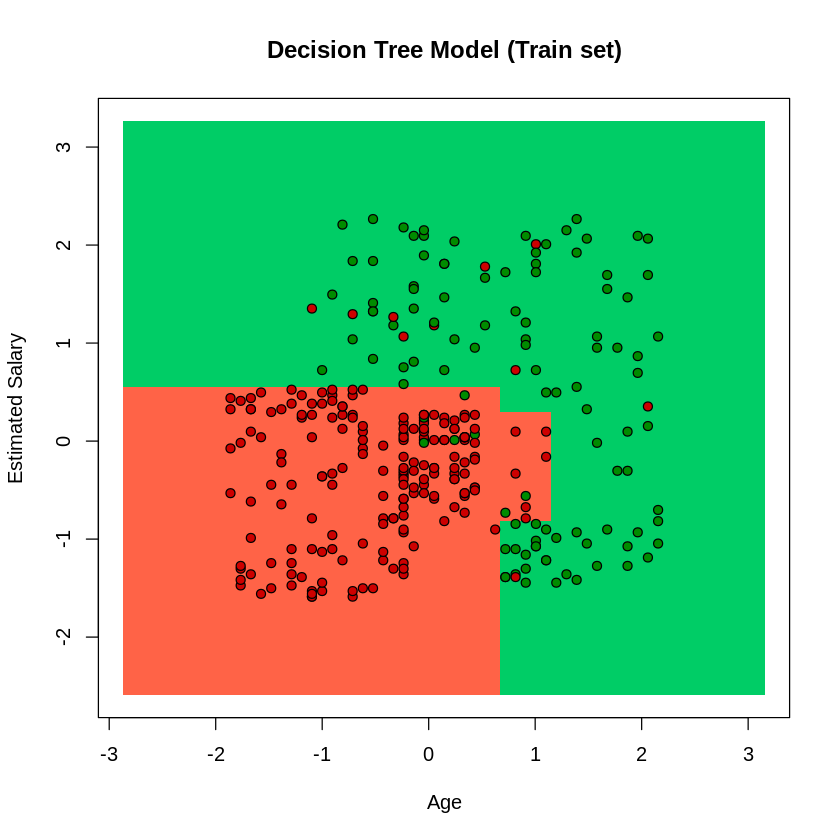

In [16]:
#library(Rfast)
set = train_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set, type = 'class')
plot(set[, -3],
     main = 'Decision Tree Model (Train set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

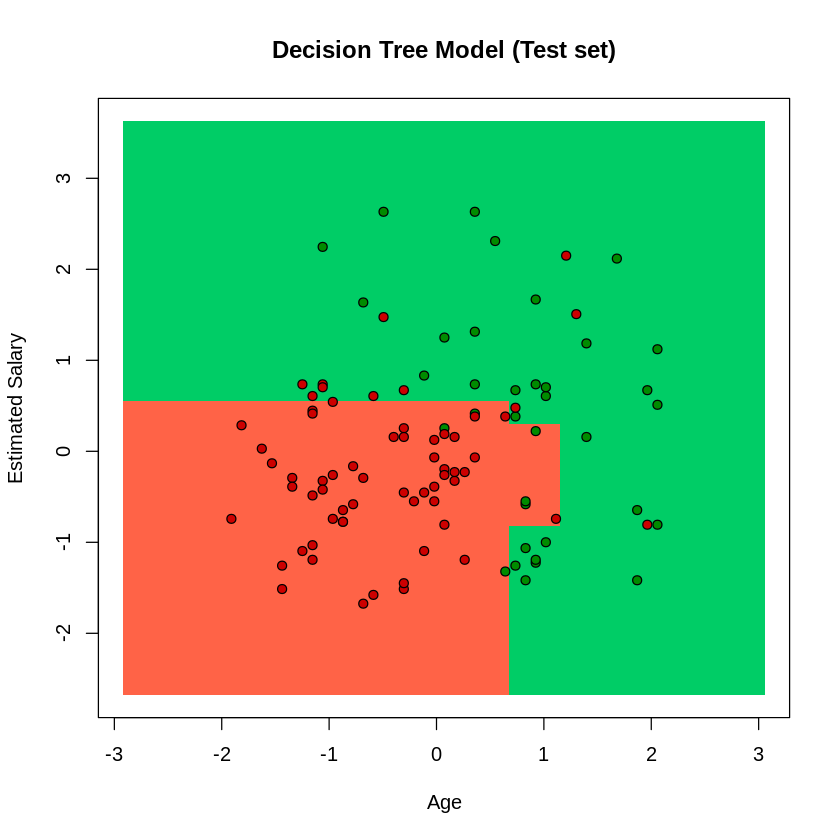

In [17]:
#library(Rfast)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set, type = 'class')
plot(set[, -3],
     main = 'Decision Tree Model (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

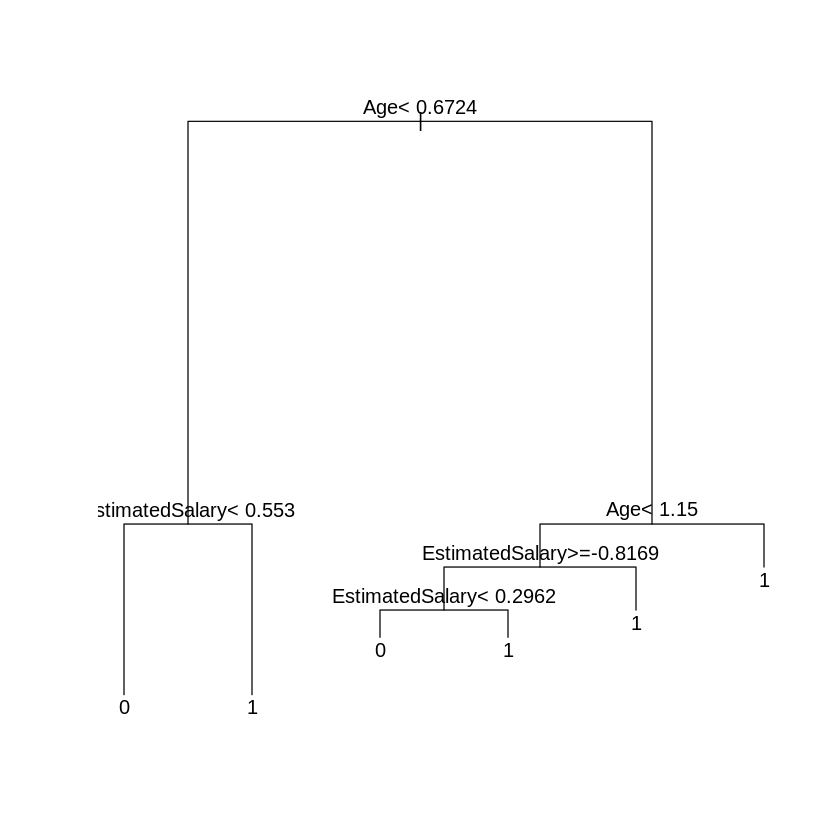

In [18]:
# Plotting the tree
plot(classifier)
text(classifier)

The output is with scaled features. Building decision tree with the original unscaled data. 

## **Building the Decision Tree**

In [19]:
ds = read.csv('/content/Social_Network_Ads.csv')
ds = ds[3:5]
ds$Purchased = factor(ds$Purchased, levels = c(0, 1)) # if you provide the 'y' parameter with a vector it assumes regression (The '$' operator selects a vector) but if you provide it with a factor it will assume classification.

In [20]:
#Splitting the dataset into the Train set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(ds$Purchased, SplitRatio = 0.75)
train_set = subset(ds, split == TRUE)
test_set = subset(ds, split == FALSE)
classifier = rpart(formula = Purchased ~ .,
                   data = train_set)
y_pred = predict(classifier, newdata = test_set[-3], type = 'class')
head(y_pred)

2  4  5  9 12 18 
 0  0  0  0  0  1 
Levels: 0 1

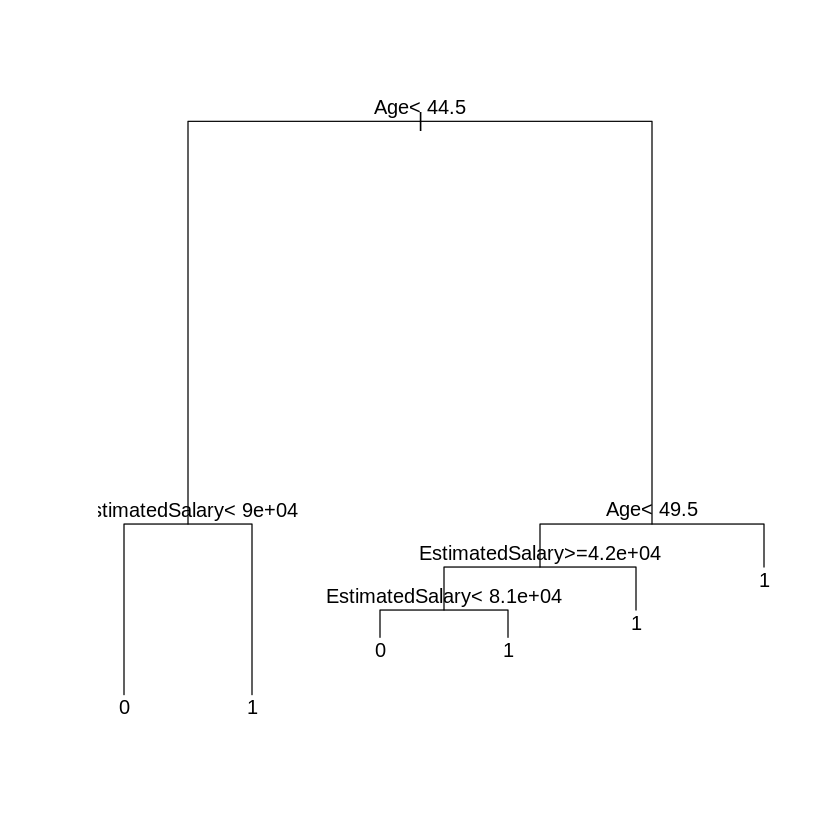

In [21]:
# Plotting the tree
plot(classifier)
text(classifier)

# **2. Random Forest Classification of Social Network Ad in R**

In [22]:
#Feature Scaling
train_set[-3] = scale(train_set[-3])
test_set[-3] = scale(test_set[-3])

## **Fitting Random Forest Classification to the Training set**

In [23]:
install.packages('randomForest')
library(randomForest)
set.seed(123)
classifier = randomForest(x = train_set[-3],
                          y = train_set$Purchased,
                          importance = TRUE, 
                          proximity = TRUE,
                          ntree = 500)
# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])
head(y_pred)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.



2  4  5  9 12 18 
 0  0  0  0  0  0 
Levels: 0 1

In [24]:
classifier


Call:
 randomForest(x = train_set[-3], y = train_set$Purchased, ntree = 500,      importance = TRUE, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 10%
Confusion matrix:
    0  1 class.error
0 177 16  0.08290155
1  14 93  0.13084112

In [25]:
summary(classifier)

                Length Class  Mode     
call                6  -none- call     
type                1  -none- character
predicted         300  factor numeric  
err.rate         1500  -none- numeric  
confusion           6  -none- numeric  
votes             600  matrix numeric  
oob.times         300  -none- numeric  
classes             2  -none- character
importance          8  -none- numeric  
importanceSD        6  -none- numeric  
localImportance     0  -none- NULL     
proximity       90000  -none- numeric  
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y                 300  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     

In [26]:
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)
cm

   y_pred
     0  1
  0 56  8
  1  7 29

## **Evaluation Metrics**

In [27]:
n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted classes
accuracy = sum(diag) / n 
cat("Accuracy of Decision Tree Model is:", accuracy)  
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 
data.frame(precision, recall, f1) 

Accuracy of Decision Tree Model is: 0.85

,precision,recall,f1
,<dbl>,<dbl>,<dbl>
0,0.8888889,0.8750000,0.8818898
1,0.7837838,0.8055556,0.7945205


## **Visualizing the Random Forest Train set results**

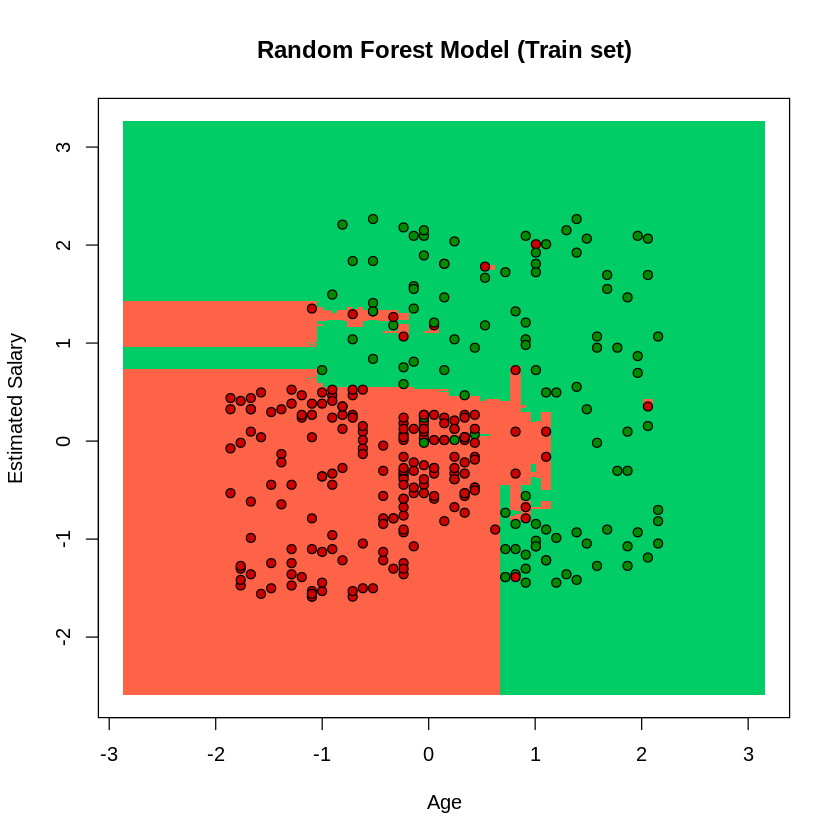

In [28]:
#library(Rfast)
set = train_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'Random Forest Model (Train set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

## **Visualizing the Random Forest Train set results**

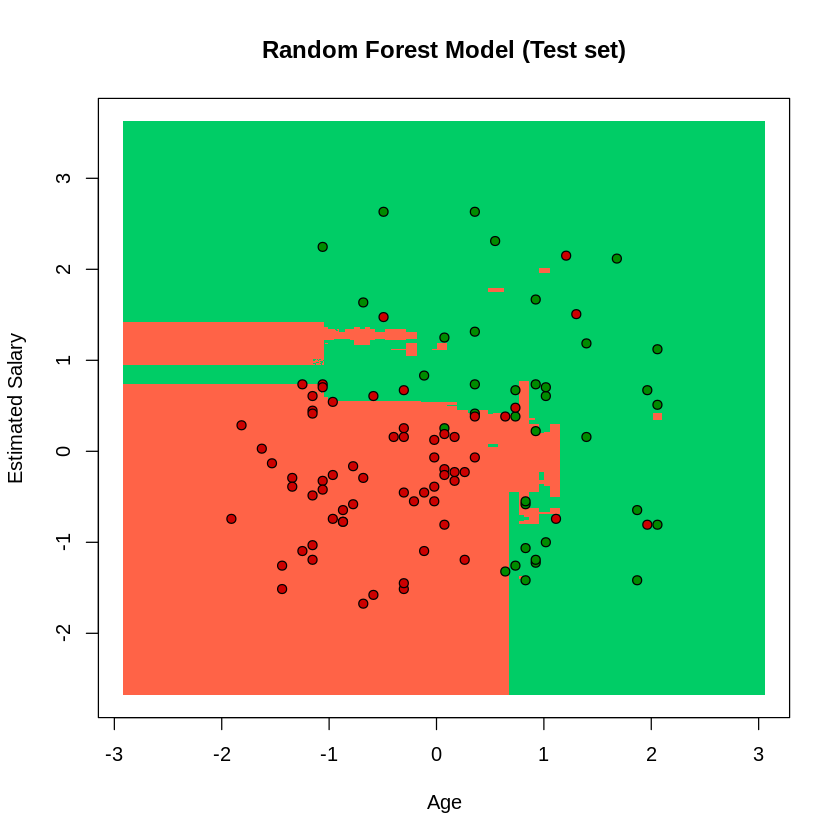

In [29]:
#library(Rfast)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'Random Forest Model (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

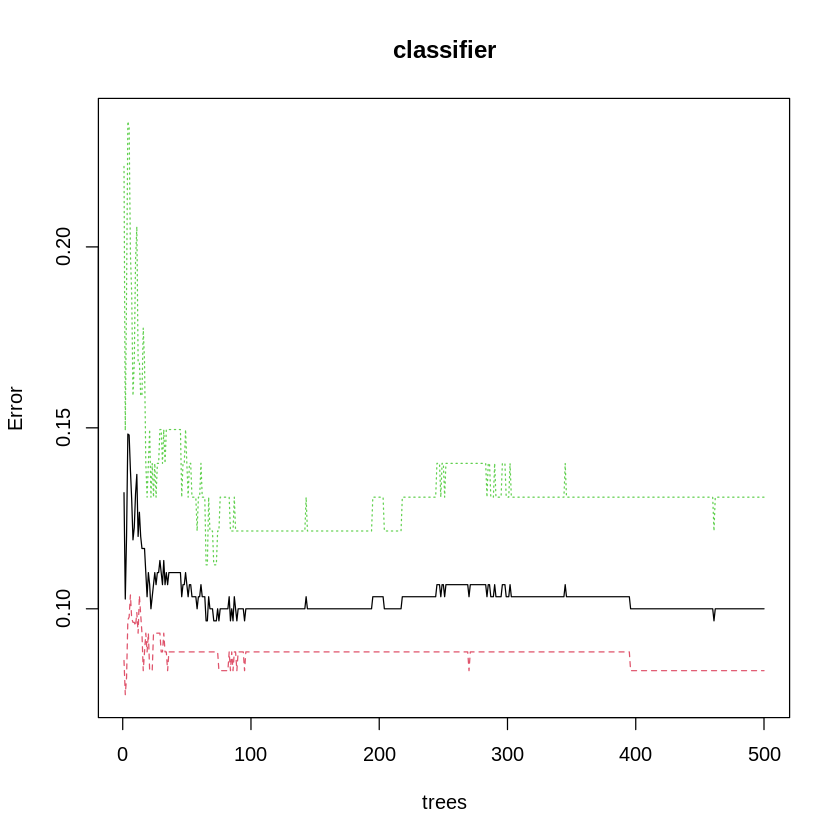

In [30]:
# Choosing the number of trees
plot(classifier)